# Customer Segmentation with RFM Analysis

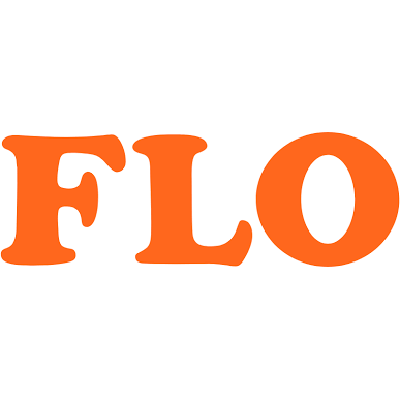

## Data set
#### The dataset consists of information obtained from the past shopping behaviors of customers who made their last purchases from Flo as OmniChannel (both online and offline shopping) in the years 2020-2021.

##### importing libraries

In [178]:
import pandas as pd
import numpy as np
import datetime
import datetime as dt

import openpyxl
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# virgülden sonra kaç basamağını göstereyim - lambda kısmı

##### Reading Data

In [179]:
df_ = pd.read_csv("flo_data_20k.csv")

In [180]:
df = df_.copy()

##### Quick look at the data

In [181]:
def datareview(dataframe):
    print("******head******")
    print(dataframe.head(10))
    print("******shape******")
    print(dataframe.shape)
    print("******info********")
    print(dataframe.info())
    print("******describe********")
    print(dataframe.describe().T)
    print("***** Nan data********")
    print(dataframe.isnull().sum())

In [182]:
datareview(df)

******head******
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   
5  e585280e-aae1-11e9-a2fc-000d3a38a36f       Desktop            Offline   
6  c445e4ee-6242-11ea-9d1a-000d3a38a36f   Android App        Android App   
7  3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f        Mobile            Offline   
8  cfbda69e-5b4f-11ea-aca7-000d3a38a36f   Android App        Android App   
9  1143f032-440d-11ea-8b43-000d3a38a36f        Mobile             Mobile   

  first_order_date last_order_date last_order_date_online  \
0       2020-10-30      2021-02-26             2021-02-21   
1       2017-02-08      

#### We created new variables for each customer's total purchases and spend

In [183]:
df["total_number_of_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["total_shopping_fee"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

#### Date type editing

In [184]:
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['first_order_date'] = pd.to_datetime(df['first_order_date'])

#### Distribution of the number of Customers in the Shopping Channels, the total number of products purchased and their total expenditures

In [185]:
df.groupby("order_channel").agg({"total_number_of_purchases": "count",
                                 "total_shopping_fee": "mean"}).head()


,total_number_of_purchases,total_shopping_fee
order_channel,,
Android App,9495,823.493
Desktop,2735,588.783
Ios App,2833,891.634
Mobile,4882,620.275


#### Top 10 Highest Profitable Customers

In [186]:
df.groupby('master_id').agg({'total_shopping_fee': 'sum'}).sort_values(by='total_shopping_fee', ascending=False).head(10)

,total_shopping_fee
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.290
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.410
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.340
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.100
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240


#### Top 10 Customers with the Most Orders

In [187]:
df.groupby('master_id').agg({'total_number_of_purchases': 'sum'}).sort_values(by='total_number_of_purchases', ascending=False).head(10)

,total_number_of_purchases
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.000
cba59206-9dd1-11e9-9897-000d3a38a36f,131.000
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.000
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.000
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.000
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.000
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.000
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.000
d696c654-2633-11ea-8e1c-000d3a38a36f,70.000


#### Functional state of data preparation process;

In [188]:
def data_edit(df):
    df["total_number_of_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    
    df["total_shopping_fee"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
    
    
    
    df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])
    
    df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
    
    df['last_order_date'] = pd.to_datetime(df['last_order_date'])
    
    df['first_order_date'] = pd.to_datetime(df['first_order_date'])
    
    
    
    return df

In [189]:
data_edit(df)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_number_of_purchases,total_shopping_fee
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]",3.000,401.960
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.000,1.000,150.480,239.990,[AKTIFSPOR],2.000,390.470
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.000,1.000,139.980,492.960,[AKTIFSPOR],3.000,632.940
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.000,5.000,711.790,297.980,"[ERKEK, AKTIFSPOR]",6.000,1009.770




#### Recency (R) :  How recently did the customer purchase ?
#### Frequency (F) : How often do they purchase ? 
#### Monetary (M) : How much do they spend ? 

## Calculation of RFM  metrics

#### For the recency value, we take 2 days after the last order as the analysis date.

In [190]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [191]:
today_date = dt.datetime(2021, 6, 2)
today_date

datetime.datetime(2021, 6, 2, 0, 0)

#### Calculation of Recency, Frequency and Monetary metrics specific to the customer

In [192]:
RFM = df.groupby('master_id').agg({'last_order_date': lambda x: (today_date - x.max()).days,
                                  'total_number_of_purchases': lambda x: x.sum(),
                                  'total_shopping_fee': lambda x: x.sum()})

In [193]:
RFM.columns= ['Recency' , 'Frequency', 'Monetary']

In [194]:
RFM

,Recency,Frequency,Monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330
...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.000,796.870
fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.000,318.870
fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.000,983.920


#### We converted the R , F, M values to scores 1-5

In [195]:
RFM["Recency_score"] = pd.qcut(RFM['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM["Frequency_score"] = pd.qcut(RFM['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM["Monetary_score"] = pd.qcut(RFM['Monetary'], 5, labels=[1, 2, 3, 4, 5])


In [196]:
RFM

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,5,4,5
...,...,...,...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,184,5.000,796.870,2,4,4
fff4736a-60a4-11ea-8dd8-000d3a38a36f,68,2.000,318.870,4,2,2
fffacd34-ae14-11e9-a2fc-000d3a38a36f,258,6.000,983.920,1,4,4


#### We saved the Recency and Frequency values as a single variable

In [197]:
RFM["RF_SCORE"] = (RFM['Recency_score'].astype(str) + RFM['Frequency_score'].astype(str))


In [198]:
RFM.head(10)

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,5,4,5,54
00136ce2-a562-11e9-a2fc-000d3a38a36f,204,2.000,359.450,2,1,2,21
00142f9a-7af6-11eb-8460-000d3a38a36f,26,3.000,404.940,5,2,2,52
0014778a-5b11-11ea-9a2c-000d3a38a36f,27,3.000,727.430,5,2,4,52
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,127,2.000,317.910,3,1,2,31


In [199]:
RFM[RFM["RF_SCORE"]=="55"]

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_SCORE
master_id,,,,,,,
004d5204-2037-11ea-87bf-000d3a38a36f,28,8.000,1170.760,5,5,5,55
00736820-a834-11e9-a2fc-000d3a38a36f,27,9.000,714.530,5,5,4,55
00b3ee24-aa44-11e9-a2fc-000d3a38a36f,25,8.000,2027.780,5,5,5,55
00cf8494-9da2-11e9-9897-000d3a38a36f,6,53.000,6275.330,5,5,5,55
0151bbee-a7de-11e9-a2fc-000d3a38a36f,15,18.000,2649.020,5,5,5,55
...,...,...,...,...,...,...,...
fe834606-c9d0-11ea-a31e-000d3a38a36f,19,9.000,2825.100,5,5,5,55
fee58510-5b48-11ea-b47b-000d3a38a36f,12,9.000,991.440,5,5,4,55
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,21,37.000,12726.100,5,5,5,55


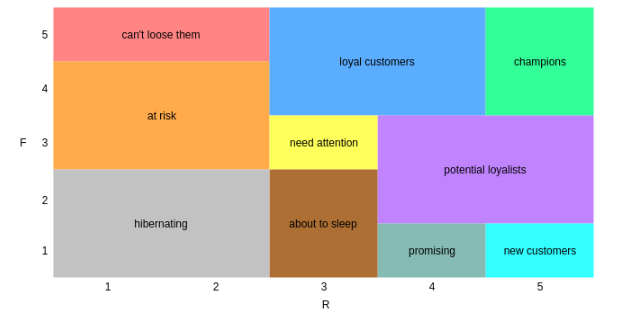

#### We divided into classes as in the image

In [200]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [201]:
RFM['segment'] = RFM['RF_SCORE'].replace(seg_map, regex=True)

In [202]:
RFM[["segment", "RF_SCORE"]].groupby("segment").agg(["mean", "count"])

RF_SCORE      
                        mean count
segment                           
about_to_sleep           inf  1643
at_Risk                  inf  3152
cant_loose               inf  1194
champions                inf  1920
hibernating              inf  3589
loyal_customers          inf  3375
need_attention           inf   806
new_customers            inf   673
potential_loyalists      inf  2925
promising                inf   668

#### Recency, Frequnec and Monetary averages of segments

In [203]:
RFM[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])


Recency       Frequency       Monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      115.032  1643     2.407  1643  361.649  1643
at_Risk             243.329  3152     4.470  3152  648.325  3152
cant_loose          236.159  1194    10.717  1194 1481.652  1194
champions            18.142  1920     8.965  1920 1410.709  1920
hibernating         248.426  3589     2.391  3589  362.583  3589
loyal_customers      83.558  3375     8.356  3375 1216.257  3375
need_attention      114.037   806     3.739   806  553.437   806
new_customers        18.976   673     2.000   673  344.049   673
potential_loyalists  37.870  2925     3.311  2925  533.741  2925
promising            59.695   668     2.000   668  334.153   668

#### Customers to watch out for

In [204]:
RFM[RFM["segment"] == "need_attention"].head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_SCORE,segment
master_id,,,,,,,,
0033a502-5bf1-11ea-829b-000d3a38a36f,106,4.000,788.730,3,3,4,33,need_attention
003c4ebc-aa23-11e9-a2fc-000d3a38a36f,109,4.000,360.760,3,3,2,33,need_attention
00f53518-ab9e-11e9-a2fc-000d3a38a36f,89,4.000,349.940,3,3,2,33,need_attention
012fe082-b134-11e9-9757-000d3a38a36f,137,4.000,609.940,3,3,3,33,need_attention
019443fe-ab05-11e9-a2fc-000d3a38a36f,89,4.000,317.450,3,3,2,33,need_attention


### A new women's shoe brand will be included. The target audience (champions,
### loyal_customers) and women are determined as shoppers. We need access to the id numbers of these customers.

In [205]:
A = (RFM[(RFM["segment"]=="champions") | (RFM["segment"]=="loyal_customers")]) 
B = df[(df["interested_in_categories_12"]).str.contains("KADIN")]

In [206]:
AB_case = pd.merge(A,B[["interested_in_categories_12","master_id"]],on=["master_id"])

In [207]:
AB_case= one_case.drop(one_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)

In [208]:
AB_case.to_csv("one_case_customer_information_1.csv")


### The target audience is (cant_loose, about_to_sleep, new_customers). We need to access the id numbers of these customers

In [209]:
C = RFM[(RFM["segment"]=="cant_loose") | (RFM["segment"]=="about_to_sleep") | (RFM["segment"]=="new_customers")]

D = df[(df["interested_in_categories_12"]).str.contains("ERKEK|COCUK")]


In [210]:
CD_case = pd.merge(C, D[["interested_in_categories_12","master_id"]],on=["master_id"])
CD_case= CD_case.drop(CD_case.loc[:,'Recency':'interested_in_categories_12'].columns,axis=1)

In [211]:
CD_case.to_csv("second_case_customer_information_2.csv",index=False)